# Choosing a location for a well

Let's say you work for the mining company GlavRosGosNeft. We need to decide where to drill a new well.

You have been provided with oil samples in three regions: in each of 10,000 fields, where the quality of oil and the volume of its reserves have been measured. Build a machine learning model to help determine the region where mining will bring the most profit. Analyze possible profits and risks using the *Bootstrap.* technique

Steps to choose a location:

- In the selected region, they are looking for deposits, for each, the values ​​of the signs are determined;
- Build a model and estimate the volume of reserves;
- Select the deposits with the highest value estimates. The number of fields depends on the company's budget and the cost of developing one well;
- The profit is equal to the total profit of the selected deposits.

## Loading and preparing data

In [58]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats as st

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [59]:
warnings.filterwarnings('ignore')

In [60]:
df1 = pd.read_csv('/datasets/geo_data_0.csv')
df2 = pd.read_csv('/datasets/geo_data_1.csv')
df3 = pd.read_csv('/datasets/geo_data_2.csv')

### Getting to know the data

In [61]:
display(df1.head())
display(df2.head())
display(df3.head())

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [62]:
display(df1.info())
display(df2.info())
display(df3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

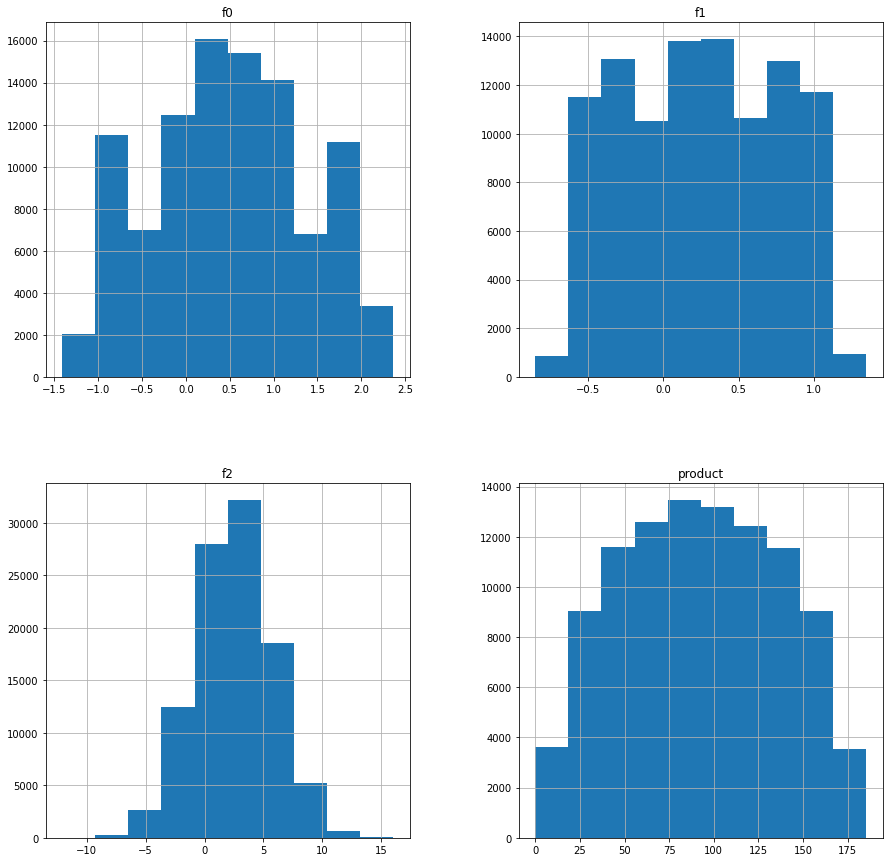

In [63]:
df1.hist(figsize=(15,15));

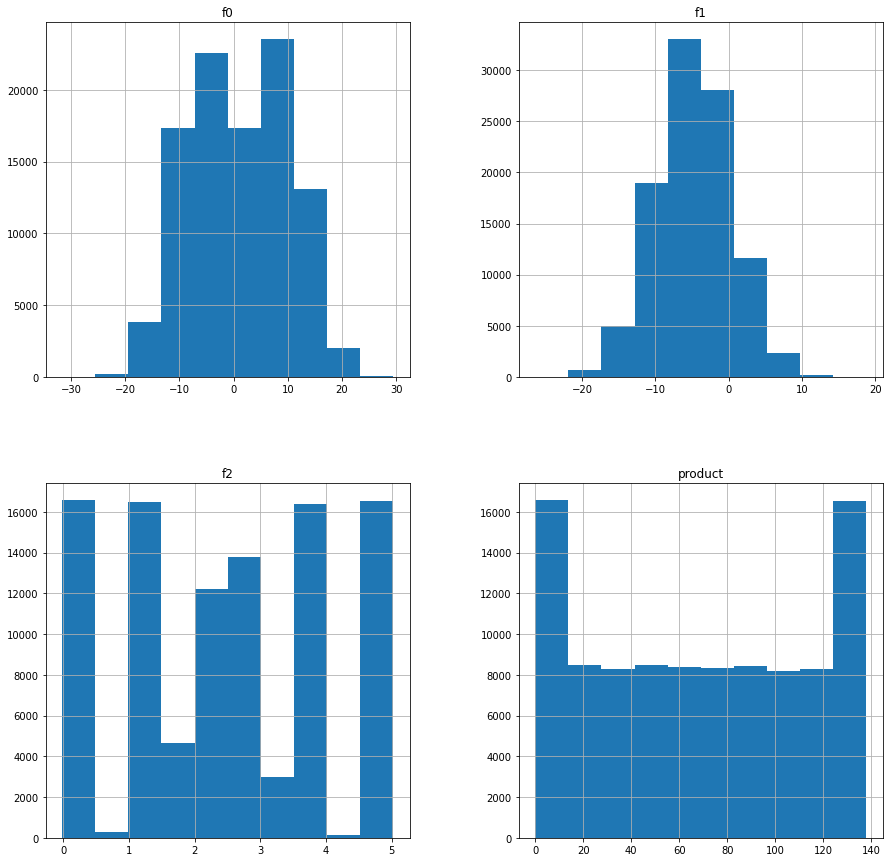

In [64]:
df2.hist(figsize=(15,15));

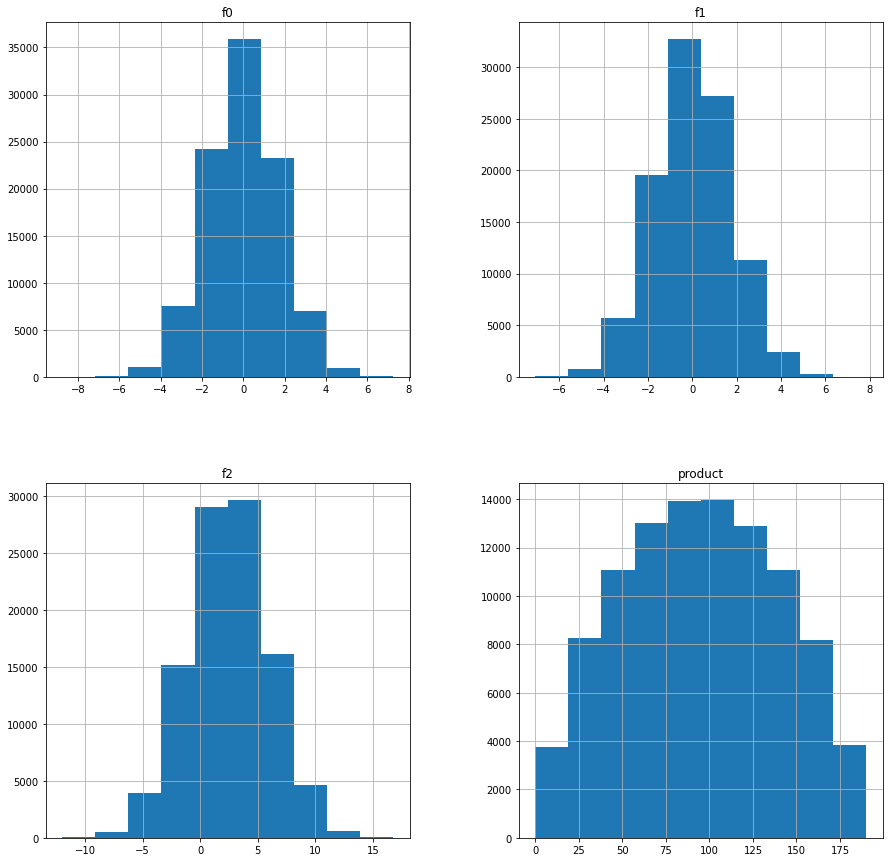

In [65]:
df3.hist(figsize=(15,15));

df2 for f2 and product parameters, the data scatter looks unusual, it's worth taking a closer look

In [66]:
df2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


### Handling duplicates

In [67]:
print('Количеcтво дубликатов df1 по id:', df1['id'].duplicated().sum())
print('Количеcтво дубликатов df2 по id:', df2['id'].duplicated().sum())
print('Количеcтво дубликатов df3 по id:', df3['id'].duplicated().sum())

Количеcтво дубликатов df1 по id: 10
Количеcтво дубликатов df2 по id: 4
Количеcтво дубликатов df3 по id: 4


In [68]:
def drop_duplicates_by_column(df, column_name, drop=False, show_duplicates=True, show_index=False):
    duplicates_list = df[df[column_name].duplicated()][column_name].tolist()
    if show_duplicates:
        print(
            df[df['id'].isin(duplicates_list)]
            .sort_values(by='id')
        )
    duplicates_indexes = df[df['id'].isin(duplicates_list)].index
    if show_index:
        print('Duplicated indexes:', duplicates_indexes)
    if drop:
        df = df.drop(index=duplicates_indexes)
        df.reset_index(drop=True, inplace=True)
    return df

df1 = drop_duplicates_by_column(df1, 'id', True)
df2 = drop_duplicates_by_column(df2, 'id', True)
df3 = drop_duplicates_by_column(df3, 'id', True)

          id        f0        f1         f2     product
66136  74z30  1.084962 -0.312358   6.990771  127.643327
64022  74z30  0.741456  0.459229   5.153109  140.771492
51970  A5aEY -0.180335  0.935548  -2.094773   33.020205
3389   A5aEY -0.039949  0.156872   0.209861   89.249364
69163  AGS9W -0.933795  0.116194  -3.655896   19.230453
42529  AGS9W  1.454747 -0.479651   0.683380  126.370504
931    HZww2  0.755284  0.368511   1.863211   30.681774
7530   HZww2  1.061194 -0.373969  10.430210  158.828695
63593  QcMuo  0.635635 -0.473422   0.862670   64.578675
1949   QcMuo  0.506563 -0.323775  -2.215583   75.496502
75715  Tdehs  0.112079  0.430296   3.218993   60.964018
21426  Tdehs  0.829407  0.298807  -0.049563   96.035308
92341  TtcGQ  0.110711  1.022689   0.911381  101.318008
60140  TtcGQ  0.569276 -0.104876   6.440215   85.350186
89582  bsk9y  0.398908 -0.400253  10.122376  163.433078
97785  bsk9y  0.378429  0.005837   0.160827  160.637302
41724  bxg6G -0.823752  0.546319   3.630479   93

In [69]:
print(df1.shape)
print(df2.shape)
print(df3.shape)

(99980, 5)
(99992, 5)
(99992, 5)


Group the duplicates and display them before deleting.\
We see that our duplicates differ in the volume of reserves in the well and the signs f0, f1, f2, about which we know nothing.\
Since we cannot put forward any hypotheses, except that the reserves in the well may have been re-evaluated. We also don’t know when, there is no date, and it’s not reliable to assume the order in which data is entered by index.
I suggest `remove duplicates` from datasets.

### Removing unnecessary data columns

In [70]:
df1 = df1.drop(['id'], axis=1)
df2 = df2.drop(['id'], axis=1)
df3 = df3.drop(['id'], axis=1)

## Training and checking models

Are we teaching?
Only linear regression.
- [ ] Make RandomizedSearchCV? and on what hyperparameters?

### Breaking down into samples

In [71]:
def prepare_Xy(df, feature_column):
    X = df.drop([feature_column], axis=1)
    y = df[feature_column]
    return X,y

X1,y1 = prepare_Xy(df1,'product')
X2,y2 = prepare_Xy(df2,'product')
X3,y3 = prepare_Xy(df3,'product')

features_train1, features_valid1, target_train1, target_valid1 = train_test_split(
    X1, y1, test_size=0.25, random_state=12345)
features_train2, features_valid2, target_train2, target_valid2 = train_test_split(
    X2, y2, test_size=0.25, random_state=12345)
features_train3, features_valid3, target_train3, target_valid3 = train_test_split(
    X3, y3, test_size=0.25, random_state=12345)

#### For the sake of interest, look at the correlation

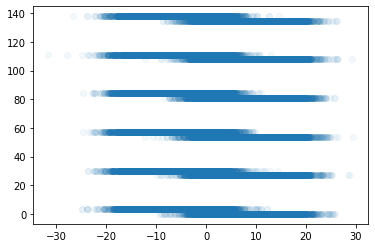

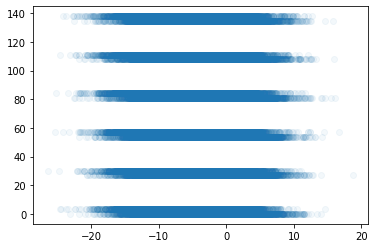

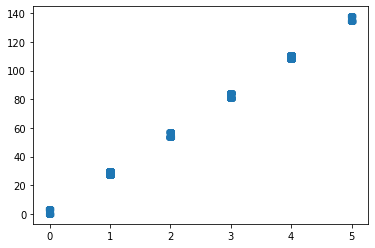

In [72]:
plt.scatter(df2['f0'], y2, alpha=0.05)
plt.show()
plt.scatter(df2['f1'], y2, alpha=0.05)
plt.show()
plt.scatter(df2['f2'], y2, alpha=0.05)
plt.show()

The `geo_data_1.csv` dataset looks weird.

### Training and Prediction on the Validation Set

In [73]:
model1 = LinearRegression(normalize = True)
model1.fit(features_train1, target_train1)
predictions_valid1 = pd.Series(model1.predict(features_valid1))

model2 = LinearRegression(normalize = True)
model2.fit(features_train2, target_train2)
predictions_valid2 = pd.Series(model2.predict(features_valid2))

model3 = LinearRegression(normalize = True)
model3.fit(features_train3, target_train3)
predictions_valid3 = pd.Series(model3.predict(features_valid3))


target_valid_i1 = target_valid1.reset_index(drop=True)
target_valid_i2 = target_valid2.reset_index(drop=True)
target_valid_i3 = target_valid3.reset_index(drop=True)

Let's translate predictions_valid into a Series and create variables target_valid_i - with the reset index, so that the indexes of the variables correspond to each other. This will help in point 5.

In [74]:
model1.get_params(deep=True)

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': True,
 'positive': False}

### We store predictions and correct answers on the validation set.

In [75]:
display(predictions_valid1)
display(target_valid_i1)
display(predictions_valid2)
display(target_valid_i2)
display(predictions_valid3)
display(target_valid_i3)

0         62.286613
1         70.428178
2         87.349562
3         26.782932
4         34.554999
            ...    
24990     76.559803
24991    122.739744
24992     95.057433
24993     78.944546
24994    115.482999
Length: 24995, dtype: float64

0         61.171722
1         94.192535
2        137.742601
3         10.936404
4         49.611033
            ...    
24990     12.229729
24991    123.241718
24992     59.061651
24993     53.837329
24994    114.154577
Name: product, Length: 24995, dtype: float64

0         55.971735
1         54.633633
2         54.674833
3        133.810938
4         85.478312
            ...    
24993      1.194595
24994    109.729474
24995    110.002046
24996    137.901663
24997      0.511335
Length: 24998, dtype: float64

0         57.085625
1         57.085625
2         53.906522
3        134.766305
4         84.038886
            ...    
24993      0.000000
24994    110.992147
24995    110.992147
24996    137.945408
24997      0.000000
Name: product, Length: 24998, dtype: float64

0         42.989028
1         95.462292
2        109.408090
3        144.760222
4        103.116807
            ...    
24993    128.238720
24994     70.665701
24995     85.507578
24996    111.319557
24997     75.944310
Length: 24998, dtype: float64

0         37.147754
1         55.498481
2         60.024016
3         33.638710
4        109.242324
            ...    
24993    110.321550
24994     38.047492
24995    138.282933
24996    147.345577
24997     65.334912
Name: product, Length: 24998, dtype: float64

### Average stock of predicted raw materials and RMSE models.

In [76]:
result1 = mean_squared_error(target_valid_i1, 
                            predictions_valid1, 
                            squared=False)

result2 = mean_squared_error(target_valid_i2, 
                            predictions_valid2, 
                            squared=False)

result3 = mean_squared_error(target_valid_i3, 
                            predictions_valid3, 
                            squared=False)
print('Регион 1.')
print('Средний запас предсказанного сырья:', predictions_valid1.mean())
print('RMSE модели линейной регрессии на валидационной выборке:', result1, '\n')

print('Регион 2.')
print('Средний запас предсказанного сырья:', predictions_valid2.mean())
print('RMSE модели линейной регрессии на валидационной выборке:', result2, '\n')

print('Регион 3.')
print('Средний запас предсказанного сырья:', predictions_valid3.mean())
print('RMSE модели линейной регрессии на валидационной выборке:', result3)

Регион 1.
Средний запас предсказанного сырья: 92.42384109947359
RMSE модели линейной регрессии на валидационной выборке: 37.716904960382735 

Регион 2.
Средний запас предсказанного сырья: 68.98311857983123
RMSE модели линейной регрессии на валидационной выборке: 0.8914901390348537 

Регион 3.
Средний запас предсказанного сырья: 95.11622302076479
RMSE модели линейной регрессии на валидационной выборке: 39.975543264382345


### Analysis of results

The average stock of raw materials is the lowest in region 2, but the RMSE is the best there, how come?
Region 1 and 3 looks adequate, as does the RMSE value.

## Preparation for profit calculation

Task conditions:
Only linear regression is suitable for training the model (the rest are not predictable enough).\
During the exploration of the region, 500 points are explored, from which, using machine learning, the best 200 are selected for development.\
The budget for the development of wells in the region is 10 billion rubles.\
At current prices, one barrel of raw materials brings 450 rubles of income. The income from each unit of the product is 450 thousand rubles, since the volume is indicated in thousands of barrels.\
After assessing the risks, you need to leave only those regions in which the probability of losses is less than 2.5%. Among them, choose the region with the highest average profit.\
Synthetic data: details of contracts and characteristics of deposits were not disclosed.

### Save all key values ​​for calculations in separate variables.

In [77]:
BUDGET = 10 * 10 ** 9
INCOME_1K = 450000
LOSS_PROB = 0.025

POINTS_TO_EXPLORE = 500
BEST_POINTS = 200

### Calculate enough raw materials to break even the development of a new well. Compare the volume of raw materials received with the average stock in each region.

In [78]:
sufficient_volume = BUDGET/INCOME_1K
print('Объём безубыточности разработки, тыс. баррелей: %.2f' % sufficient_volume)
sufficient_volume_per_well = sufficient_volume/BEST_POINTS
print('Объём безубыточности разработки, для одной скважины %.2f' % sufficient_volume_per_well)

print('Регион 1 средний запас в скважине, тыс. баррелей: %.2f' % df1['product'].mean())
print('Регион 2 средний запас в скважине, тыс. баррелей: %.2f' % df2['product'].mean())
print('Регион 3 средний запас в скважине, тыс. баррелей: %.2f' % df3['product'].mean())

Объём безубыточности разработки, тыс. баррелей: 22222.22
Объём безубыточности разработки, для одной скважины 111.11
Регион 1 средний запас в скважине, тыс. баррелей: 92.50
Регион 2 средний запас в скважине, тыс. баррелей: 68.82
Регион 3 средний запас в скважине, тыс. баррелей: 95.00


### Write conclusions on the stage of preparing the profit calculation.

It turns out that the volume of break-even development we have is greater than the average reserves in a well in each of the regions.
This should lead us to the conclusion that a random selection of wells will not give a profit and we will go to a loss.

## Calculation of profit and risks

### Write a function to calculate profit from selected wells and model predictions

1. Select wells with the highest prediction values.
2. Sum the target volume of raw materials corresponding to these predictions.
3. Calculate the profit for the received volume of raw materials.

In [79]:
def max_profit(predictions, target, sufficient_volume):
    predictions_sorted_best = predictions.sort_values(ascending=False)
    predicted_volume_total = target[predictions_sorted_best.index][:BEST_POINTS].sum()
    profit = (predicted_volume_total - sufficient_volume) * INCOME_1K
    return profit

Calculate **real** volume(target_valid) using indexes of predicted volume sorted and selected from 2000 wells.
predictions_sorted_best.index will have repetitions when called inside the bootstrap_4region function

### Apply the Bootstrap technique with 1000 samples to find the profit distribution.

In [80]:
def bootstrap_4region(predictions_valid, target_valid_i):
    
    state = np.random.RandomState(12345)
    values = []
    
    for i in range(1000):
        predictions_subsample = predictions_valid.sample(n=500, replace=True, random_state=state)
        values.append(max_profit(predictions_subsample, target_valid_i, sufficient_volume)) 

    values = pd.Series(values)
    return values

In [81]:
a = pd.Series([2, 2, 2, 3], index = [1, 1, 1, 2])
print(a.index)
print(a[[1, 1, 1, 2]])

Int64Index([1, 1, 1, 2], dtype='int64')
1    2
1    2
1    2
1    2
1    2
1    2
1    2
1    2
1    2
2    3
dtype: int64


We get the predictions_subsample dataset with repeated indices and values.
If we take and reset indexes from predictions_subsample, then it is not clear how in the profit function I can pull out the real profit from target?
After all, the correspondence of indices with a selection of real production by indices will be lost.

You can try to pass the predictions subsample and the full validation set to the revenue calculation function.
After sorting the predictions subsample, make a selection by indices from target_valid, where there are no repetitions, and calculate the profit.

In [82]:
val = []
val.append(bootstrap_4region(predictions_valid1, target_valid_i1))
val.append(bootstrap_4region(predictions_valid2, target_valid_i2))
val.append(bootstrap_4region(predictions_valid3, target_valid_i3))

### Find the average return, 95% confidence interval, and risk of loss. Loss is negative profit.

In [83]:
for i in range(3):
    lower = val[i].quantile(0.025)
    higher = val[i].quantile(0.975)
    print(f'Регион {i+1} \n  Процент прибыльных в 1000 выборок: {(val[i] > 0).mean()*100}%')
    print(f'  Вероятность убытка: {(val[i] < 0).mean()*100}%')
    print(f'  Среднее значение прибыли: {int(val[i].mean()):,}')
    print(f'  95%-й доверительный интервал:')
    print(f'     Нижний квантиль {lower:,.0f}')
    print(f'     Верхний квантиль {higher:,.0f}')

Регион 1 
  Процент прибыльных в 1000 выборок: 94.5%
  Вероятность убытка: 5.5%
  Среднее значение прибыли: 431,538,186
  95%-й доверительный интервал:
     Нижний квантиль -80,924,627
     Верхний квантиль 941,037,638
Регион 2 
  Процент прибыльных в 1000 выборок: 98.0%
  Вероятность убытка: 2.0%
  Среднее значение прибыли: 477,948,839
  95%-й доверительный интервал:
     Нижний квантиль 51,741,836
     Верхний квантиль 897,944,131
Регион 3 
  Процент прибыльных в 1000 выборок: 87.7%
  Вероятность убытка: 12.3%
  Среднее значение прибыли: 322,147,249
  95%-й доверительный интервал:
     Нижний квантиль -173,464,434
     Верхний квантиль 843,529,290


### Write conclusions: suggest a region for well development and justify the choice.

Profitability of more than 95% is observed only in region 2.\
Region 1 fell short.\
In this case, it can be recommended to consider only the second region for production.

However, the first region is also worthy of the right to be considered, subject to a 0.5% increase in risk.

## Project readiness checklist

Put 'x' in completed items. Then press Shift+Enter.

- [x] Jupyter Notebook open
- [x] All code runs without errors
- [x] Cells with code are arranged in execution order
- [x] Step 1 completed: data prepared
- [x] Step 2 completed: models trained and validated
- [x] Data correctly split into training and validation sets
- [x] Models trained, predictions made
- [x] Validation set predictions and correct answers saved
- [x] Results printed on screen
- [x] Conclusions drawn
- [x] Step 3 completed: Profit calculation done
- [x] Python constants created for all key values
- [x] Calculated the minimum average amount of the product in the deposits of the region, sufficient for development
- [x] Conclusions drawn from the previous paragraph
- [x] Profit calculation function written
- [x] Step 4 completed: risks and rewards calculated
- [x] Performed procedure *Bootstrap*
- [x] All bootstrap parameters match the condition
- [x] Found all required values
- [x] Proposed region for the development of the field
- [x] Region choice justified